In [328]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import scipy.stats as stats

In [368]:
# load data
df_dataset = pd.read_excel("Dataset.xlsx")
df_key = pd.read_excel("Key.xlsx")

In [369]:
# replace nan in income column with 10
df_dataset['Income'] = df_dataset['Income'].replace(np.nan,10)

In [370]:
# preprocessing
df_dataset.drop('ID',axis=1,inplace=True)
df_dataset.dropna(inplace=True)

In [371]:
print(len(df_dataset))

11333


# Hypothesis - 3

- Healthcare workers or people who have family members working in healthcare services exhibit significant difference in levels of psychological distress compared to the general population.

In [358]:
health_workers = df_dataset[df_dataset['Health_Worker_Self'] == 1]['K6']
others = df_dataset[df_dataset['Health_Worker_Self'] == 2]['K6']
print(type(health_workers))

<class 'pandas.core.series.Series'>


In [359]:
print("Number of Health Workers: ", health_workers.count())
print("Others: ", others.count())

Number of Health Workers:  528
Others:  9098


In [363]:
# Calculate the median COVID-19 anxiety score for different groups
median_k6_score = health_workers.median()
print(f"Median K6 score for healthcare population: {median_k6_score}")

median_covid19_anxiety_score = others.median()
print(f"Median K6 score for non-healthcare population: {median_covid19_anxiety_score}")


Median K6 score for healthcare population: 5.0
Median K6 score for non-healthcare population: 4.0


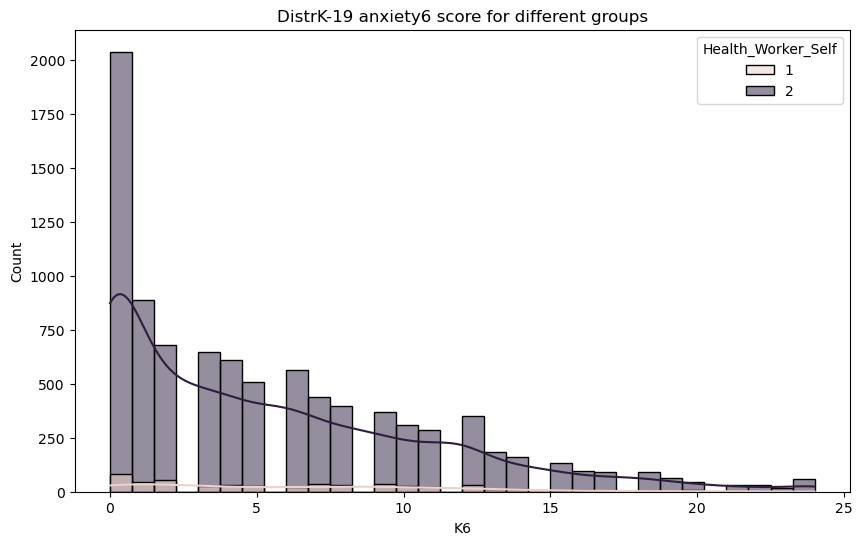

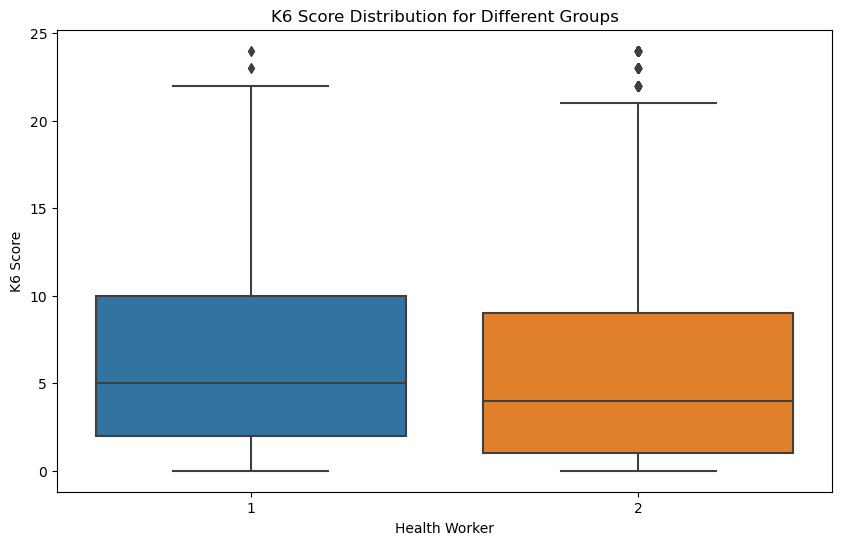

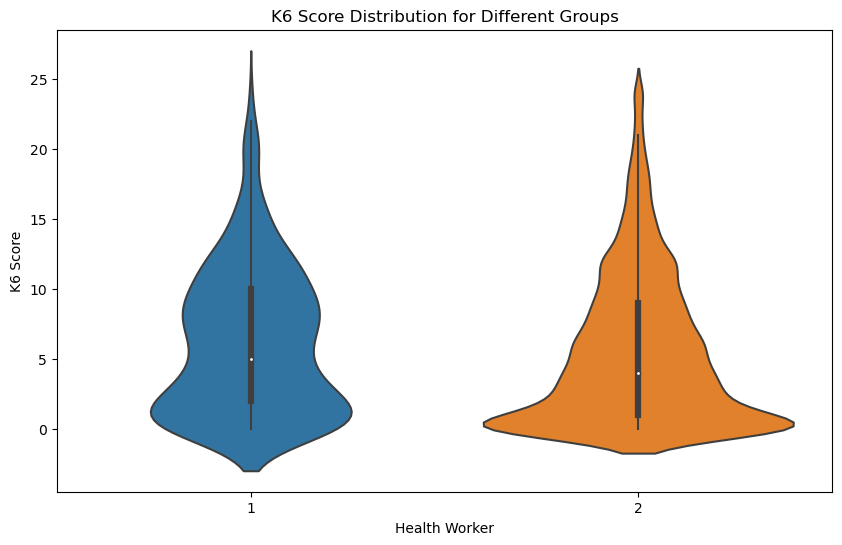

In [361]:
# plot the distribution of COVID-19 anxiety score for different groups
plt.figure(figsize=(10, 6))
sb.histplot(data=df_dataset, x='K6', hue='Health_Worker_Self', kde=True)
plt.title("DistrK-19 anxiety6 score for different groups")
plt.show()

# plot boxplot
plt.figure(figsize=(10, 6))
sb.boxplot(x='Health_Worker_Self', y='K6', data=df_dataset)
plt.title('K6 Score Distribution for Different Groups')
plt.xlabel('Health Worker')
plt.ylabel('K6 Score')
plt.show()

# plot violin plot 
plt.figure(figsize=(10, 6))
sb.violinplot(x='Health_Worker_Self', y='K6', data=df_dataset)
plt.title('K6 Score Distribution for Different Groups')
plt.xlabel('Health Worker')
plt.ylabel('K6 Score')
plt.show()

- we choose Mann-Whitney U test to test the hypothesis as the data is ordinal and non-parametric.

### Mann-Whitney U Test

In [362]:
result_mwu = stats.mannwhitneyu(health_workers,
                           others)

print("Mann-Whitney U test statistic:", result_mwu.statistic)
print("p-value:", result_mwu.pvalue)

#  Interpret the results
if result_mwu.pvalue < 0.05:
    print("There are statistically significant differences in psychological distress levels between healthcare workers or individuals with family members in healthcare services and the general population.")
else:
    print("There are no statistically significant differences in psychological distress levels between the two groups.")

Mann-Whitney U test statistic: 2648949.0
p-value: 6.142873755016243e-05
There are statistically significant differences in psychological distress levels between healthcare workers or individuals with family members in healthcare services and the general population.


#### To do
- size difference between the two groups is large, how to handle?
- explain the violin plot
- explain why we are using Mann-Whitney U Test
- write the explanation for the results and the conclusion

#### Bootstrap Sampling

In [337]:
# health_workers = np.array(health_workers)
# others = np.array(others)

# n1 = len(health_workers)
# n2 = len(others)

# all_data = np.concatenate([health_workers, others])

# u_statistics = []

# for _ in range(1000):
#     # Resample with replacement
#     resampled_data = np.random.choice(all_data, size=(n1 + n2), replace=True)
    
#     # Calculate U statistic for the resampled data
#     resampled_group1 = resampled_data[:n1]
#     resampled_group2 = resampled_data[n1:]

#     u_statistic = stats.mannwhitneyu(health_workers, others).pvalue
#     # u_statistic = calculate_u_statistic(resampled_group1, resampled_group2)
    
#     u_statistics.append(u_statistic)    

# p_value = np.mean(u_statistics)
# print("Bootstrap sampled mean of p value: ", p_value)

# Hypothesis 1

### People of different age groups categories experienced different psychological distress levels due to the mild lockdown of COVID-19.

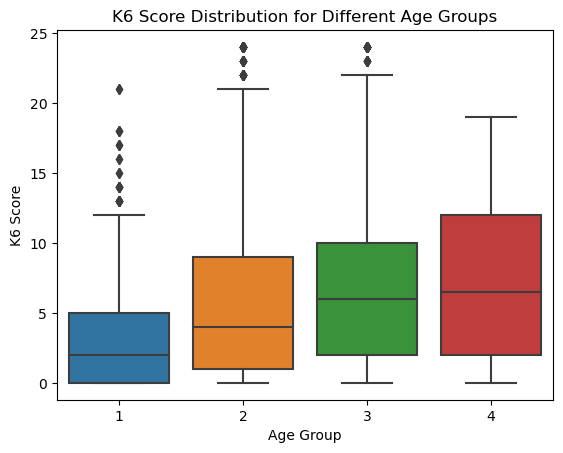

In [338]:
# categorical predictors - Sex, Married, Job_Group, Residence, Income, Age_Group
# K6, PHQ9, UCLA_LS3, LSNS6  - all ordinal variables (outcomes)

# first we test for age vs K6, we have four age groups 1, 2, 3, 4. 1 for >=65, 2 for 40-64, 3 for 20-39, 4 for 18-19
# K6 is the outcome variable
# H0: There is no difference in K6 score across different age groups
# H1: There is a difference in K6 score across different age groups

# K6 vs Age_Group
sb.boxplot(x='Age_Group', y='K6', data=df_dataset)
plt.title('K6 Score Distribution for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('K6 Score')
plt.show()



In [339]:
K6_age_group_1 = df_dataset[df_dataset['Age_Group'] == 1]['K6']
K6_age_group_2 = df_dataset[df_dataset['Age_Group'] == 2]['K6']
K6_age_group_3 = df_dataset[df_dataset['Age_Group'] == 3]['K6']
K6_age_group_4 = df_dataset[df_dataset['Age_Group'] == 4]['K6']

# mean K6 score for different age groups
print(f"Mean K6 score for age group 1: {K6_age_group_1.mean()}")
print(f"Mean K6 score for age group 2: {K6_age_group_2.mean()}")
print(f"Mean K6 score for age group 3: {K6_age_group_3.mean()}")
print(f"Mean K6 score for age group 4: {K6_age_group_4.mean()}")

# size
print(f"Size of age group 1: {K6_age_group_1.count()}") 
print(f"Size of age group 2: {K6_age_group_2.count()}")
print(f"Size of age group 3: {K6_age_group_3.count()}")
print(f"Size of age group 4: {K6_age_group_4.count()}")

# as the group 4 has very less data, we can combine group 3 and 4
K6_age_group_3_4 = df_dataset[df_dataset['Age_Group'].isin([3, 4])]['K6']

Mean K6 score for age group 1: 3.1004531722054383
Mean K6 score for age group 2: 5.431004784688995
Mean K6 score for age group 3: 6.613636363636363
Mean K6 score for age group 4: 7.225
Size of age group 1: 1324
Size of age group 2: 5225
Size of age group 3: 2948
Size of age group 4: 80


In [340]:
# as there are 4 groups and ordinal outcome variable, we can use Kruskal-Wallis test
result_kw = stats.kruskal(K6_age_group_1, K6_age_group_2, K6_age_group_3_4)

print("Kruskal-Wallis test statistic:", result_kw.statistic)
print("p-value:", result_kw.pvalue)

#  Interpret the results
if result_kw.pvalue < 0.05:
    print("There are statistically significant differences in K6 scores across different age groups.")
else:
    print("There are no statistically significant differences in K6 scores across different age groups.")


Kruskal-Wallis test statistic: 393.5293518738749
p-value: 3.517118549723237e-86
There are statistically significant differences in K6 scores across different age groups.


- The Games-Howell test was conducted as a post hoc analysis, following a significant Kruskal-Wallis test, indicating that there is a statistically significant difference in K6 scores among at least two of the age groups. This test is particularly suitable because it accounts for unequal sample sizes among the groups.


In [341]:
# we do post-hoc analysis if the Kruskal-Wallis test is significant to determine which groups are different we do games-howell test as sample sizes are different
if result_kw.pvalue < 0.05:
    from pingouin import pairwise_gameshowell

    # replace age group 4 with 3
    df_dataset['Age_Group'] = df_dataset['Age_Group'].replace(4, 3)
    posthoc_games_howell = pairwise_gameshowell(data=df_dataset, dv='K6', between='Age_Group')
    print(posthoc_games_howell)

    

   A  B   mean(A)   mean(B)      diff        se          T           df  \
0  1  2  3.100453  5.431005 -2.330552  0.124923 -18.655876  2926.346034   
1  1  3  3.100453  6.629789 -3.529335  0.145325 -24.285761  3798.852299   
2  2  3  5.431005  6.629789 -1.198784  0.128364  -9.338933  5941.860604   

           pval    hedges  
0  0.000000e+00 -0.460893  
1  1.290967e-12 -0.676044  
2  0.000000e+00 -0.217584  


1. Pairwise Comparisons:
- Group 1 (>=65) vs. Group 2 (40-64):
The p-value is extremely small (4.188248e-06), indicating a statistically significant difference in K6 scores between these two groups.
The Hedges' g effect size is 0.137743, suggesting a small effect size. This means the difference in K6 scores, while statistically significant, is not very large in practical terms.
- Group 1 (>=65) vs. Group 3 (18-39):
The p-value is essentially 0 (9.214851e-14), indicating a highly significant difference in K6 scores between these groups.
The Hedges' g effect size is 0.400528, suggesting a medium to large effect size. This means the difference in K6 scores is substantial and practically meaningful.
- Group 2 (40-64) vs. Group 3 (18-39):
The p-value is 0 (0.000000e+00), indicating a highly significant difference in K6 scores.
The Hedges' g effect size is 0.259542, suggesting a small to medium effect size. The difference in K6 scores is statistically significant and practically relevant.
2. Conclusion:
- We reject the null hypothesis of no difference in K6 scores across the three age groups.
- All pairwise comparisons are statistically significant, indicating that each age group has significantly different K6 scores compared to the other two groups.
- The effect sizes suggest that the differences between Group 1 (>=65) and Group 3 (18-39) are the most substantial, followed by the differences between Group 2 (40-64) and Group 3 (18-39).

In [342]:
# Optimism
# Deterioration_Economy
# Deterioration_Interact
# Frustration
# Covid_Anxiety
# Covid_Sleepless
# Difficulty_Living
# Difficulty_Work

# 4th hypothesis ke liye

### People of different Residence categories managed their lifestyle differently during the COVID-19 pandemic.

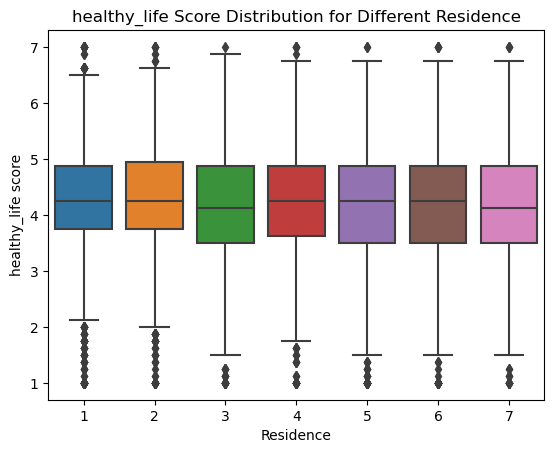

In [343]:
# H0: There is no difference in K6 score across different regions of japan
# H1: There is a difference in K6 score across different regions of japan
# 1 = Tokyo, 2 = Kanagawa, 3 = Saitama, 4 = Chiba, 5 = Osaka, 6 = Hyogo, 7 = Fukuoka
healthy_life = ["Exercise", "Healthy_Diet", "Healthy_Sleep", "Activity", "Interaction_Offline", "Interaction_Online", "Preventive_Behaviors", "Optimism"]
# healthy_life = ["Exercise", "Healthy_Diet", "Interaction_Offline", "Interaction_Online"]

df_dataset["healthy_life"] = df_dataset[healthy_life].mean(axis=1)
independent_var = "Residence"
dependent_var = "healthy_life" 
# K6 vs Residence
sb.boxplot(x=independent_var, y=dependent_var, data=df_dataset)
plt.title(f'{dependent_var} Score Distribution for Different {independent_var}')
plt.xlabel(independent_var)
plt.ylabel(f'{dependent_var} score')
plt.show()


In [344]:
k6_region_1 = df_dataset[df_dataset[independent_var] == 1][dependent_var] # Tokyo
k6_region_2 = df_dataset[df_dataset[independent_var] == 2][dependent_var] # Kanagawa
k6_region_3 = df_dataset[df_dataset[independent_var] == 3][dependent_var] # Saitama
k6_region_4 = df_dataset[df_dataset[independent_var] == 4][dependent_var] # Chiba
k6_region_5 = df_dataset[df_dataset[independent_var] == 5][dependent_var] # Osaka
k6_region_6 = df_dataset[df_dataset[independent_var] == 6][dependent_var] # Hyogo
k6_region_7 = df_dataset[df_dataset[independent_var] == 7][dependent_var] # Fukuoka

# print mean K6 score for different regions
print(f"Mean K6 score for Tokyo: {k6_region_1.mean()}")
print(f"Mean K6 score for Kanagawa: {k6_region_2.mean()}")
print(f"Mean K6 score for Saitama: {k6_region_3.mean()}")
print(f"Mean K6 score for Chiba: {k6_region_4.mean()}")
print(f"Mean K6 score for Osaka: {k6_region_5.mean()}")
print(f"Mean K6 score for Hyogo: {k6_region_6.mean()}")
print(f"Mean K6 score for Fukuoka: {k6_region_7.mean()}")
# size
print(f"Size of Tokyo: {k6_region_1.count()}")
print(f"Size of Kanagawa: {k6_region_2.count()}")
print(f"Size of Saitama: {k6_region_3.count()}")
print(f"Size of Chiba: {k6_region_4.count()}")
print(f"Size of Osaka: {k6_region_5.count()}")
print(f"Size of Hyogo: {k6_region_6.count()}")
print(f"Size of Fukuoka: {k6_region_7.count()}")

# k6_sex_1 = df_dataset[df_dataset['Sex'] == 1][var]
# k6_sex_2 = df_dataset[df_dataset['Sex'] == 2][var]

# # mean K6 score for different age groups
# print(f"Mean K6 score for Males:", k6_sex_1.mean())
# print(f"Mean K6 score for Females:", k6_sex_2.mean())

# # size
# print(f"Size of Males:", k6_sex_1.count())
# print(f"Size of Females:", k6_sex_2.count())

# divide the K6 score into 3 grpups, <=4, 5-12, >=13 and do chi-square test
# # H0: There is no association between K6 score and region of japan
# # H1: There is an association between K6 score and region of japan
# df_dataset['K6_Group'] = pd.cut(df_dataset[var], bins=[0, 4, 12, 24], labels=['Low', 'Medium', 'High'])

# # contingency table
# contingency_table = pd.crosstab(df_dataset['Residence'], df_dataset['K6_Group'])
# print(contingency_table)

# # chi-square test
# chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
# print("Chi-square test statistic:", chi2)
# print("p-value:", p)

# # do for males and females
# df_dataset['K6_Group'] = pd.cut(df_dataset[var], bins=[0, 4, 12, 24], labels=['Low', 'Medium', 'High'])

# contingency_table = pd.crosstab(df_dataset['Sex'], df_dataset['K6_Group'])
# print(contingency_table)

# # chi-square test
# chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
# print("Chi-square test statistic:", chi2)
# print("p-value:", p)

# # post-hoc analysis
# if p < 0.05:
#     from statsmodels.stats.multicomp import pairwise_tukeyhsd

#     posthoc_tukey = pairwise_tukeyhsd(df_dataset['K6_Group'], df_dataset['Sex'])
#     print(posthoc_tukey)



Mean K6 score for Tokyo: 4.245103201347936
Mean K6 score for Kanagawa: 4.227595099935526
Mean K6 score for Saitama: 4.103712671509282
Mean K6 score for Chiba: 4.194713758079409
Mean K6 score for Osaka: 4.10981384715872
Mean K6 score for Hyogo: 4.151555793991417
Mean K6 score for Fukuoka: 4.131199538638985
Size of Tokyo: 2374
Size of Kanagawa: 1551
Size of Saitama: 1239
Size of Chiba: 1083
Size of Osaka: 1531
Size of Hyogo: 932
Size of Fukuoka: 867


In [345]:
# as there are 7 groups and ordinal outcome variable, we can use Kruskal-Wallis test
# result_kw = stats.kruskal(k6_region_2, k6_region_3, k6_region_5)
result_kw = stats.kruskal(k6_region_1, k6_region_2, k6_region_3, k6_region_4, k6_region_5, k6_region_6, k6_region_7)

print("Kruskal-Wallis test statistic:", result_kw.statistic)
print("p-value:", result_kw.pvalue)

#  Interpret the results
if result_kw.pvalue < 0.05:
    print("There are statistically significant differences in K6 scores across different regions of Japan.")
else:
    print("There are no statistically significant differences in K6 scores across different regions of Japan.")

# # as we have only two groups, and ordinal outcome variable, we can use Mann-Whitney U test
# result_mwu = stats.mannwhitneyu(k6_sex_1, k6_sex_2)
# print("Mann-Whitney U test statistic:", result_mwu.statistic)
# print("p-value:", result_mwu.pvalue)

# #  Interpret the results
# if result_mwu.pvalue < 0.05:
#     print(f"There are statistically significant differences in {var} scores between Males and Females.")
# else:
#     print(f"There are no statistically significant differences in {var} scores between Males and Females.")

Kruskal-Wallis test statistic: 23.117796862193234
p-value: 0.0007579701078372337
There are statistically significant differences in K6 scores across different regions of Japan.


In [346]:
# post-hoc analysis
if result_kw.pvalue < 0.05:
    # from pingouin import pairwise_gameshowell
    # new_df = df_dataset[df_dataset['Residence'].isin([2, 3, 5])]
    # posthoc_games_howell = pairwise_gameshowell(data=new_df, dv=var, between='Residence')
    # print(posthoc_games_howell)
    # tukey test
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    from statsmodels.stats.multicomp import MultiComparison

    # new_df = df_dataset[df_dataset[independent_var].isin([2, 3, 5])]
    mc = MultiComparison(df_dataset[dependent_var], df_dataset[independent_var])
    result = mc.tukeyhsd()
    print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0175 0.9989 -0.1213  0.0863  False
     1      3  -0.1414 0.0035 -0.2528 -0.0299   True
     1      4  -0.0504 0.8638  -0.167  0.0662  False
     1      5  -0.1353 0.0025 -0.2395 -0.0311   True
     1      6  -0.0935 0.2719 -0.2165  0.0294  False
     1      7  -0.1139 0.1082 -0.2401  0.0123  False
     2      3  -0.1239 0.0412 -0.2451 -0.0027   True
     2      4  -0.0329 0.9878 -0.1588   0.093  False
     2      5  -0.1178 0.0392 -0.2323 -0.0032   True
     2      6   -0.076 0.6152 -0.2078  0.0558  False
     2      7  -0.0964 0.3478 -0.2312  0.0385  False
     3      4    0.091 0.3964 -0.0413  0.2233  False
     3      5   0.0061    1.0 -0.1154  0.1276  False
     3      6   0.0478 0.9488   -0.09  0.1857  False
     3      7   0.0275 0.9975 -0.1133  0.1683  False
     4      5  -0.0849 0.4257 -0.2112  0.0414 

### People of different Job profile categories experienced different psychological impacts due to the mild lockdown of COVID-19.

In [213]:
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
stressors = ["Deterioration_Economy", "Deterioration_Interact", "Frustration", "Covid_Anxiety", "Covid_Sleepless", "Difficulty_Living", "Difficulty_Work"]
df_dataset["stressors"] = df_dataset[stressors].mean(axis=1)
independent_var = "Job_Group"
dependent_var = "stressors"

# Perform MANOVA
formula = ' + '.join(stressors
) + ' ~ ' + independent_var
manova = MANOVA.from_formula(formula, data=df_dataset)

# Print MANOVA results
print(manova.mv_test())

# 1 = employed, 2 = home maker, 3 = student, 4 = unemployed, 5 = others
k6_emp = df_dataset[df_dataset['Job_Group'] == 1][dependent_var]
k6_home = df_dataset[df_dataset['Job_Group'] == 2][dependent_var]
k6_stud = df_dataset[df_dataset['Job_Group'] == 3][dependent_var]
k6_unemp = df_dataset[df_dataset['Job_Group'] == 4][dependent_var]
k6_other = df_dataset[df_dataset['Job_Group'] == 5][dependent_var]

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.2458 7.0000 9618.0000 4215.5373 0.0000
         Pillai's trace 0.7542 7.0000 9618.0000 4215.5373 0.0000
 Hotelling-Lawley trace 3.0681 7.0000 9618.0000 4215.5373 0.0000
    Roy's greatest root 3.0681 7.0000 9618.0000 4215.5373 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
         Job_Group        Value  Num DF   Den DF  F Value Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.9726 7.0000 9618.0000 38.7560 0.0000
           Pillai's trace 0.0274 7.0000 9618.

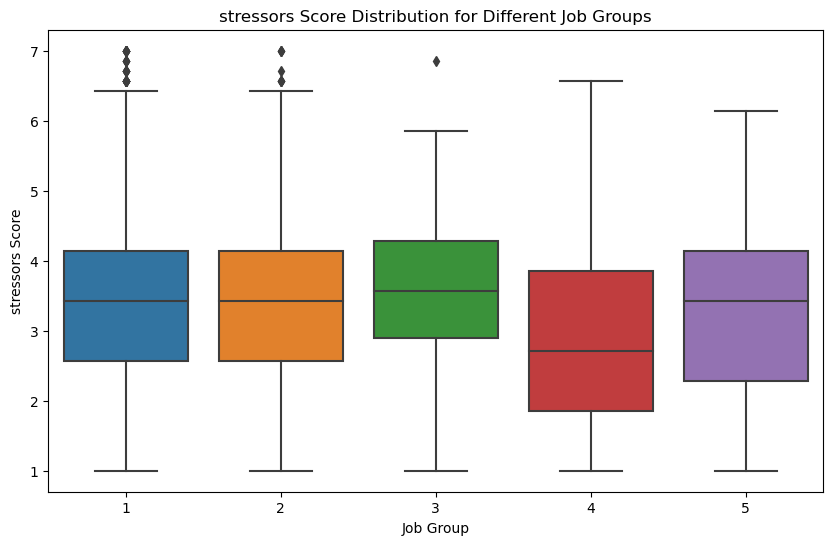

In [210]:
# plot
plt.figure(figsize=(10, 6))
sb.boxplot(x='Job_Group', y=dependent_var, data=df_dataset)
plt.title(f'{dependent_var} Score Distribution for Different Job Groups')
plt.xlabel('Job Group')
plt.ylabel(f'{dependent_var} Score')
plt.show()

In [211]:
# kruskal wallis test
result_kw = stats.kruskal(k6_emp, k6_home, k6_stud, k6_unemp, k6_other)

print("Kruskal-Wallis test statistic:", result_kw.statistic)
print("p-value:", result_kw.pvalue)

# Interpret the results
if result_kw.pvalue < 0.05:
    print(f"There are statistically significant differences in {dependent_var} scores across different job groups.")
else:
    print(f"There are no statistically significant differences in {dependent_var} scores across different job groups.")


Kruskal-Wallis test statistic: 182.60742548145643
p-value: 2.0536221951833232e-38
There are statistically significant differences in stressors scores across different job groups.


- we use games-howell test as post hoc analysis to test the hypothesis as the groups have unequal sample sizes.

In [212]:
# post-hoc analysis
if result_kw.pvalue < 0.05:
    # games-howell test
    from pingouin import pairwise_gameshowell

    posthoc_games_howell = pairwise_gameshowell(data=df_dataset, dv=dependent_var, between=independent_var)
    print(posthoc_games_howell)
        

   A  B   mean(A)   mean(B)      diff        se          T           df  \
0  1  2  3.361987  3.376252 -0.014265  0.033232  -0.429254  2190.121792   
1  1  3  3.361987  3.550739 -0.188752  0.062164  -3.036371   322.317887   
2  1  4  3.361987  2.828483  0.533504  0.039651  13.455095  1280.560352   
3  1  5  3.361987  3.303102  0.058886  0.071350   0.825301   328.990304   
4  2  3  3.376252  3.550739 -0.174487  0.067512  -2.584544   443.184475   
5  2  4  3.376252  2.828483  0.547769  0.047599  11.507929  2074.691661   
6  2  5  3.376252  3.303102  0.073151  0.076055   0.961808   421.816265   
7  3  4  3.550739  2.828483  0.722256  0.070892  10.188149   523.492725   
8  3  5  3.550739  3.303102  0.247637  0.092436   2.679024   583.604600   
9  4  5  2.828483  3.303102 -0.474618  0.079071  -6.002434   484.417333   

           pval    hedges  
0  9.929323e-01 -0.012286  
1  2.164994e-02 -0.162938  
2  2.853273e-13  0.459004  
3  9.226929e-01  0.050494  
4  7.495170e-02 -0.154289  
5  0.0

| Group Comparison | Mean Difference | p-value | Effect Size (Hedges' g) | Interpretation |
|---|---|---|---|---|
| 1 vs. 2 | 0.0455 | 0.9982 | 0.0085 | No significant difference in psychological distress between employed individuals and homemakers. |
| 1 vs. 3 | -1.2461 | 0.0033 | -0.2296 | Students experience significantly *higher* psychological distress compared to employed individuals (small to medium effect). |
| 1 vs. 4 | 0.9004 | 8.02e-06 | 0.1669 | Unemployed individuals experience significantly *lower* psychological distress compared to employed individuals (small effect). |
| 1 vs. 5 | -0.3888 | 0.7753 | -0.0717 | No significant difference in psychological distress between employed individuals and those in the "others" category. | 
| 2 vs. 3 | -1.2916 | 0.0041 | -0.2425 | Students experience significantly *higher* psychological distress compared to homemakers (small to medium effect). |
| 2 vs. 4 | 0.8548 | 0.0008 | 0.1629 | Unemployed individuals experience significantly *lower* psychological distress compared to homemakers (small effect). | 
| 2 vs. 5 | -0.4343 | 0.7403 | -0.0816 | No significant difference in psychological distress between homemakers and those in the "others" category. |
| 3 vs. 4 | 2.1465 | 2.57e-07 | 0.3982 | Students experience significantly *higher* psychological distress compared to unemployed individuals (medium to large effect). |
| 3 vs. 5 | 0.8573 | 0.3657 | 0.1488 | No significant difference in psychological distress between students and those in the "others" category. | 
| 4 vs. 5 | -1.2892 | 0.0049 | -0.2393 | Individuals in the "others" category experience significantly *higher* psychological distress compared to unemployed individuals (small to medium effect). |

In [106]:
# the effect of gender and employment on covid anxiety, we can use two-way ANOVA
# H0: There is no interaction effect
# H1: There is an interaction effect
from statsmodels.stats.anova import anova_lm

from statsmodels.formula.api import ols

model = ols('Covid_Anxiety ~ C(Sex) + C(Job_Group) + C(Sex):C(Job_Group)', data=df_dataset)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          Covid_Anxiety   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     58.04
Date:                Fri, 19 Apr 2024   Prob (F-statistic):          7.18e-104
Time:                        22:11:41   Log-Likelihood:                -18508.
No. Observations:                9626   AIC:                         3.704e+04
Df Residuals:                    9616   BIC:                         3.711e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

## Socio-demographic characteristics by psychological distress severity

In [372]:
independent_vars = ["Age_Group", "Residence", "Sex", "Job_Group", "Health_Worker_Self", "Health_Worker_Family", "Married", "Income", "Current_Physical", "Past_Physical", "Current_Mental", "Past_Mental"]
dependent_vars = "K6"


In [373]:
for independent_var in independent_vars:
    # print(f"Independent Variable: {independent_var}")

    # sb.boxplot(x=independent_var, y=dependent_vars, data=df_dataset)
    # plt.title(f'{dependent_vars} Score Distribution for Different {independent_var}')
    # plt.xlabel(independent_var)
    # plt.ylabel(f'{dependent_vars} score')
    # plt.show()

    # make contentingency table for K6 divided into 3 groups <=4, 5-12, >=13
    df_dataset['K6_Group'] = pd.cut(df_dataset[dependent_vars], bins=[0, 4, 12, 24], labels=['Low', 'Medium', 'High'])

    # contingency table
    contingency_table = pd.crosstab(df_dataset[independent_var], df_dataset['K6_Group'])
    print(contingency_table)
    # chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print("Chi-square test statistic:", chi2)
    print("p-value:", p)
    print("==============================")
    # break
    # # post-hoc analysis
    # if p < 0.05:
    #     from statsmodels.stats.multicomp import pairwise_tukeyhsd

    #     posthoc_tukey = pairwise_tukeyhsd(df_dataset['K6_Group'], df_dataset[independent_var])
    #     print(posthoc_tukey)
    
    

K6_Group    Low  Medium  High
Age_Group                    
1           568     358    31
2          1851    2230   637
3          1013    1508   604
4            32      50    31
Chi-square test statistic: 308.8822567912665
p-value: 1.021386275087234e-63
K6_Group   Low  Medium  High
Residence                   
1          884     991   324
2          561     668   202
3          450     539   191
4          376     490   145
5          519     692   200
6          352     407   122
7          322     359   119
Chi-square test statistic: 11.49590134902092
p-value: 0.48696429431321475
K6_Group   Low  Medium  High
Sex                         
1         1639    1789   504
2         1825    2357   799
Chi-square test statistic: 31.5682524571422
p-value: 1.3965004412719013e-07
K6_Group    Low  Medium  High
Job_Group                    
1          2280    2852   885
2           595     699   188
3            99     158    74
4           371     304   102
5           119     133    54
Chi-squ

| Characteristic, n (%) | No or Low | Mild-to-Moderate Distress | Serious | Total | χ² | df | p |
|------------------------|-----------|---------------------------|---------|-------|----|---|---|
| **Residence**          |           |                           |         |       | 11.27| 6 | 0.51|
| Tokyo                  | 766 (41.0)| 832 (44.6)                | 268 (14.4) | 1866  |   |   |   |
| Kanagawa               | 471 (39.5)| 551 (46.3)                | 170 (14.3) | 1192  |   |   |   |
| Saitama                | 385 (39.2)| 442 (45.0)                | 156 (15.8) | 983   |   |   |   |
| Chiba                  | 329 (38.0)| 421 (48.7)                | 114 (13.2) | 864   |   |   |   |
| Osaka                  | 455 (37.7)| 582 (48.3)                | 168 (13.9) | 1205  |   |   |   |
| Hyogo                  | 298 (41.0)| 327 (45.0)                | 101 (13.9) | 726   |   |   |   |
| Fukuoka                | 281 (42.0)| 292 (43.7)                | 95 (14.2)  | 668   |   |   |   |
| **Sex**                |           |                           |           |       | 24.21| 2 | <0.001|
| Male                   | 1490 (42.0)| 1618 (45.6)              | 442 (12.4) | 3550  |   |   |   |
| Female                 | 1495 (37.8)| 1829 (46.2)              | 630 (15.9) | 3954  |   |   |   |
| **Age Group**          |           |                           |           |       | 264.82| 6 | <0.001|
| 18-19                  | 15 (23.1) | 33 (50.8)                 | 17 (26.2)  | 65    |   |   |   |
| 20-39                  | 808 (32.9)| 1170 (47.7)               | 475 (19.4) | 2453  |   |   |   |
| 40-64                  | 1632 (39.9)| 1910 (46.7)              | 551 (13.5) | 4093  |   |   |   |
| >=65                   | 530 (59.4)| 334 (37.4)                | 29 (3.2)   | 893   |   |   |   |
| **Job Group**          |           |                           |           |       | 53.02| 8 | <0.001|
| Employed               | 1984 (38.7)| 2401 (46.8)              | 740 (14.4) | 5125  |   |   |   |
| Homemaker              | 491 (41.2)| 553 (46.4)                | 148 (12.4) | 1192  |   |   |   |
| Student                | 64 (27.1) | 118 (50.0)                | 54 (22.9)  | 236   |   |   |   |
| Unemployed             | 337 (48.1)| 275 (39.3)                | 88 (12.6)  | 700   |   |   |   |
| Others                 | 109 (43.4)| 100 (39.8)                | 42 (16.8)  | 251   |   |   |   |
| **Healthcare worker (self)** |     |                           |           |       | 5.66 | 2 | 0.06|
| No                     | 2828 (40.1)| 3219 (45.6)              | 1013 (14.3)| 7060  |   |   |   |
| Yes                    | 157 (35.4)| 228 (51.4)                | 59 (13.3)  | 444   |   |   |   |
| **Healthcare worker (family)** |   |                           |           |       | 2.49 | 2 | 0.28|
| No                     | 2711 (39.7)| 3145 (46.0)              | 976 (14.3) | 6832  |   |   |   |
| Yes                    | 274 (36.7)| 302 (40.4)                | 96 (12.9)  | 672   |   |   |   |
| **Marital status**     |           |                           |           |       | 124.17| 2 | <0.001|
| Unmarried              | 1975 (41.3)| 2112 (44.2)              | 502 (10.5) | 4589  |   |   |   |
| Married                | 1010 (22.7)| 1335 (30.1)              | 570 (12.8) | 2915  |   |   |   |
| **Annual household income (JPY)** | |                         |           |       | 79.93 | 10| <0.001|
| < 2.0 million          | 159 (22.5)| 233 (33.0)                | 127 (18.0) | 519   |   |   |   |
| 2.0-3.9 million        | 625 (39.2)| 739 (46.3)                | 231 (14.5) | 1595  |   |   |   |
| 4.0-5.9 million        | 686 (35.9)| 797 (41.7)                | 243 (12.7) | 1726  |   |   |   |
| 6.0-7.9 million        | 485 (41.7)| 529 (45.5)                | 149 (12.8) | 1163  |   |   |   |
| >= 8.0 million         | 324 (26.5)| 336 (27.5)                | 75 (6.1)   | 735   |   |   |   |
| Unknown                | 163 (42.0)| 182 (47.0)                | 42 (10.8)  | 387   |   |   |   |
| **Current treatment for severe physical illness** | |             |           |       | 1.92 | 2 | 0.38|
| No                     | 2845 (35.9)| 3289 (41.5)              | 1012 (12.8)| 7146  |   |   |   |
| Yes                    | 140 (39.1)| 158 (44.1)                | 60 (16.8)  | 358   |   |   |   |
| **Past treatment for severe physical illness** |    |            |           |       | 0.57 | 2 | 0.75|
| No                     | 2732 (35.9)| 3169 (41.6)              | 979 (12.9) | 6880  |   |   |   |
| Yes                    | 253 (40.4)| 278 (44.4)                | 93 (14.8)  | 624   |   |   |   |
| **Current treatment for mental problem** |          |            |           |       | 405.84 | 2 | <0.001|
| No                     | 2908 (33.8)| 3215 (37.4)              | 847 (9.9)  | 6970  |   |   |   |
| Yes                    | 77 (14.4) | 232 (43.5)                | 225 (42.1) | 534   |   |   |   |
| **Past treatment for mental problem** |             |            |           |       | 295.66 | 2 | <0.001|
| No                     | 2742 (32.9)| 2938 (35.3)              | 756 (9.1)  | 7436  |   |   |   |
| Yes                    | 243 (22.8)| 509 (47.7)                | 316 (29.6) | 1068  |   |   |   |

#### Conclusions
- In the SPD group, the following characteristics were observed to be significantly more prevalent: aged 18-19 years or 20-39 years, women, students, income of less than 2 million yen, currently being treated for psychological problems, and having been treated for psychological problems in the past (all ps < 0.001).
- In the MMPD group, significantly more participants were employed, students, homemakers, unmarried, currently being treated for psychological problems and had received treatment for psychological problems in the past.

In [388]:
import pandas as pd
from scipy.stats import kruskal

# ... (assuming you have your data in a pandas DataFrame called 'df_dataset') ...

# Function to perform Kruskal-Wallis test and format results
def kruskal_wallis_analysis(df, dep_var, indep_var):
    age_group_labels = ['18-19', '20-39', '40-64', '>=65']
    age_1 = df[df[indep_var] == 1][dep_var]
    age_2 = df[df[indep_var] == 2][dep_var]
    age_3 = df[df[indep_var] == 3][dep_var]
    age_4 = df[df[indep_var] == 4][dep_var]

    # # Perform Kruskal-Wallis test
    # result_kw = kruskal(age_1, age_2, age_3, age_4) 

    # # Print the results
    # print(f"Kruskal-Wallis test statistic: {result_kw.statistic}")
    # print(f"p-value: {result_kw.pvalue}")

    # Fit the ANOVA model
    model = sm.OLS(df[dep_var], sm.add_constant(df[indep_var])).fit()
    residuals = model.resid

    # Normality check with kolmogorov-smirnov test
    normality_test = stats.kstest(residuals, 'norm')
    # print("Kolmogorov-Smirnov test p-value:", normality_test.pvalue)

    if normality_test.pvalue < 0.05:
        print("The residuals are not normally distributed.")

        # Perform Kruskal-Wallis test
        result_kw = kruskal(age_1, age_2, age_3, age_4)
        print(f"Kruskal-Wallis test statistic: {result_kw.statistic}")  
        print(f"p-value: {result_kw.pvalue}")

        # Interpret the results
        if result_kw.pvalue < 0.05:
            print(f"There are statistically significant differences in {dep_var} scores across different {indep_var} groups.")
        else:
            print(f"There are no statistically significant differences in {dep_var} scores across different {indep_var} groups.")

        # perform post-hoc analysis
        if result_kw.pvalue < 0.05:
            from pingouin import pairwise_gameshowell

            # Perform pairwise Games-Howell post-hoc test
            posthoc_games_howell = pairwise_gameshowell(data=df, dv=dep_var, between=indep_var)
            # print only p-values and group comparisons
            print(posthoc_games_howell)
    else:
        print("The residuals are normally distributed.")

        # Homogeneity of variances check with Levene's test
        homogeneity_test = stats.levene(*[residuals[df[indep_var] == group] for group in df[indep_var]])
        print("Levene's test p-value:", homogeneity_test.pvalue)

        if homogeneity_test.pvalue < 0.05:
            print("The variances are not homogeneous.")
            # perform welch anova
            from pingouin import welch_anova

            # Perform Welch ANOVA
            result_welch = welch_anova(data=df, dv=dep_var, between=indep_var)
            print(result_welch)

            # Interpret the results
            if result_welch['p-unc'][0] < 0.05:
                print(f"There are statistically significant differences in {dep_var} scores across different {indep_var} groups.")
            else:
                print(f"There are no statistically significant differences in {dep_var} scores across different {indep_var} groups.")

            # perform post-hoc analysis
            if result_welch['p-unc'][0] < 0.05:
                from pingouin import pairwise_gameshowell

                # Perform pairwise Games-Howell post-hoc test
                posthoc_games_howell = pairwise_gameshowell(data=df, dv=dep_var, between=indep_var)
                # print only p-values and group comparisons
                print(posthoc_games_howell[['A', 'B', 'pval']])

        else:
            print("The variances are homogeneous.")
            # perform one-way ANOVA
            from pingouin import anova

            # Perform one-way ANOVA
            result_anova = anova(data=df, dv=dep_var, between=indep_var)
            print(result_anova)

            # Interpret the results
            if result_anova['p-unc'][0] < 0.05:
                print(f"There are statistically significant differences in {dep_var} scores across different {indep_var} groups.")
            else:
                print(f"There are no statistically significant differences in {dep_var} scores across different {indep_var} groups.")

            # perform post-hoc analysis
            if result_anova['p-unc'][0] < 0.05:
                from statsmodels.stats.multicomp import pairwise_tukeyhsd

                # Perform Tukey's post-hoc test
                posthoc_tukey = pairwise_tukeyhsd(df[dep_var], df[indep_var])
                print(posthoc_tukey)

# Call the function for each pair of dependent and independent variables
independent_var = "Age_Group"
# dependent_vars = ["K6", "PHQ9", "UCLA_LS3", "LSNS6", "Exercise", "Healthy_Diet", "Healthy_Sleep", "Activity", "Interaction_Offline", "Interaction_Online", "Preventive_Behaviors", "Optimism"]
dependent_vars = ["Deterioration_Economy", "Deterioration_Interact", "Frustration", "Covid_Anxiety", "Covid_Sleepless", "Difficulty_Living", "Difficulty_Work"]

for dependent_var in dependent_vars:
    print(f"Dependent Variable: {dependent_var}")
    kruskal_wallis_analysis(df_dataset, dependent_var, independent_var)
    print("==============================")
    # break


Dependent Variable: Deterioration_Economy
The residuals are not normally distributed.
Kruskal-Wallis test statistic: 145.06447785962703
p-value: 3.0572638293143847e-31
There are statistically significant differences in Deterioration_Economy scores across different Age_Group groups.
   A  B   mean(A)   mean(B)      diff        se          T           df  \
0  1  2  3.244194  3.845618 -0.601423  0.049859 -12.062537  2267.872410   
1  1  3  3.244194  3.919626 -0.675432  0.053909 -12.529025  2891.021843   
2  1  4  3.244194  3.951049 -0.706855  0.167285  -4.225450   163.973592   
3  2  3  3.845618  3.919626 -0.074009  0.038634  -1.915627  7627.882227   
4  2  4  3.845618  3.951049 -0.105431  0.163005  -0.646798   147.907239   
5  3  4  3.919626  3.951049 -0.031423  0.164289  -0.191265   152.617481   

           pval    hedges  
0  0.000000e+00 -0.339255  
1  1.382117e-12 -0.368488  
2  2.293921e-04 -0.417977  
3  2.214596e-01 -0.040344  
4  9.165225e-01 -0.058556  
5  9.975096e-01 -0.0165

| Dependent Variable   | Kruskal-Wallis Statistic | p-value        | (40 to 64) vs >=65  | (20 to 39) vs >=65  | (18 to 19) vs >=65  |
|----------------------|--------------------------|--------------|--------------|--------------|--------------|
| K6                   | 462.83                   | 5.40e-100    | 1.27e-12     | 0.00         | 4.63e-11     |
| PHQ9                 | 549.35                   | 9.61e-119    | 0.00         | 0.00         | 2.84e-11     |
| UCLA_LS3             | 276.29                   | 1.35e-59     | 4.92e-13     | 6.83e-13    | 3.21e-06     |
| LSNS6                | 194.16                   | 7.72e-42     | 2.31e-13     | **0.98**         | 0.01         |
| Exercise             | 133.33                   | 1.04e-28     | 0.00         | 0.00         | **0.19**         |
| Healthy_Diet         | 179.33                   | 1.23e-38     | 0.00         | 0.00         | 5.13e-07     |
| Healthy_Sleep        | 485.92                   | 5.37e-105    | 2.27e-13     | 0.00         | 4.40e-14     |
| Activity             | 147.39                   | 9.65e-32     | 6.09e-13     | 1.72e-07    | **0.09**         |
| Interaction_Offline  | 20.00                    | 0.000169     | **0.18**         | **0.40**         | 0.01         |
| Interaction_Online   | 540.66                   | 7.37e-117    | 5.22e-05     | 0.00         | 1.55e-08     |
| Preventive_Behaviors | 59.47                    | 7.61e-13     | **0.34**         | 0.02         | **0.09**         |
| Optimism             | 131.57                   | 2.48e-28     | 3.28e-13     | 1.50e-12    | **0.59**         |
| Deterioration_Economy   | 145.06                   | 3.06e-31     | 0.00         | 1.38e-12     | 0.00         |
| Deterioration_Interact | 103.24                   | 3.12e-22     | 0.00         | 1.53e-12     | 0.01         |
| Frustration              | 410.44                   | 1.21e-88     | 0.00         | 0.00         | 0.00         |
| Covid_Anxiety            | 171.36                   | 6.48e-37     | 0.00         | 2.69e-13     | 0.04         |
| Covid_Sleepless         | 70.91                    | 2.73e-15     | 0.00         | 7.74e-14     | **0.98**         |
| Difficulty_Living       | 296.53                   | 5.62e-64     | 0.00         | 0.00         | 0.01         |
| Difficulty_Work         | 724.82                   | 8.72e-157    | 0.00         | 0.00         | 0.00         |

## Shambhavi

In [391]:
from scipy.stats import pearsonr

x_columns = [
    'Exercise',
    'Healthy_Diet',
    'Healthy_Sleep',
    'Activity',
    'Interaction_Offline',
    'Interaction_Online',
    'Preventive_Behaviors',
    'Optimism',
    'Deterioration_Economy',
    'Deterioration_Interact',
    'Frustration',
    'Covid_Anxiety',
    'Covid_Sleepless',
    'Difficulty_Living',
    'Difficulty_Work'
]

y_columns = [
    'K6',
    'PHQ9',
    'UCLA_LS3',
    'LSNS6'
]

# Calculate Pearson's correlation coefficient
correlation_coefficients = []
p_values = []
for x_col in x_columns:
    for y_col in y_columns:
        corr, p = pearsonr(df_dataset[x_col], df_dataset[y_col])
        correlation_coefficients.append((x_col, y_col, corr))
        p_values.append((x_col, y_col, p))

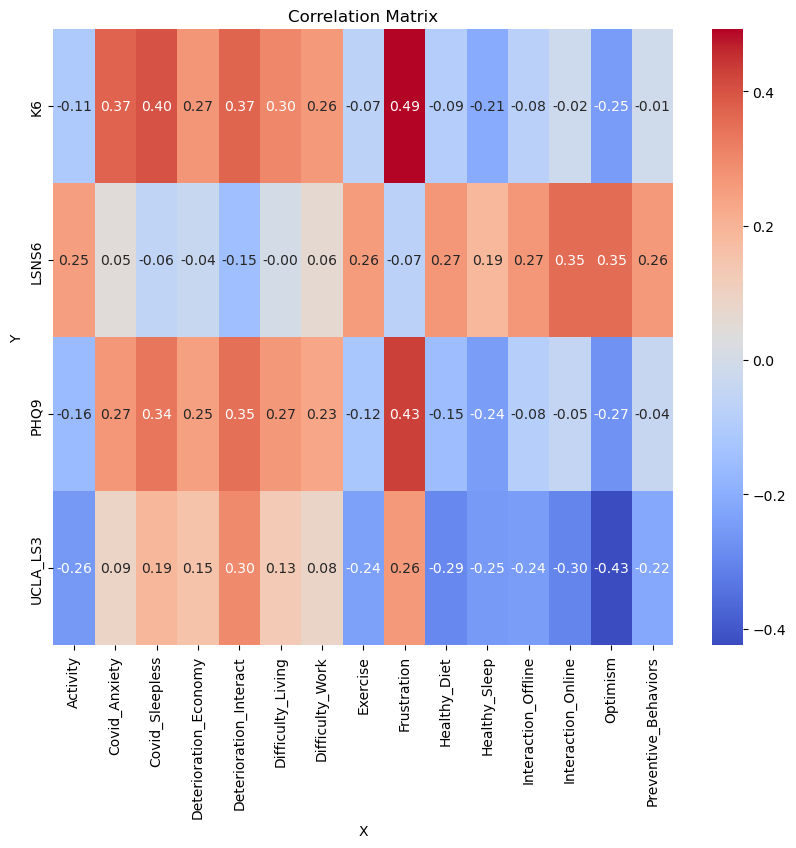

In [392]:
corr_df = pd.DataFrame(correlation_coefficients, columns=['X', 'Y', 'Correlation'])
p_df = pd.DataFrame(p_values, columns=['X', 'Y', 'P-Value'])
correlation_table = corr_df.pivot(index='Y', columns='X', values='Correlation')
p_table = p_df.pivot(index='Y', columns='X', values='P-Value')
# print(correlation_table)
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_table, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

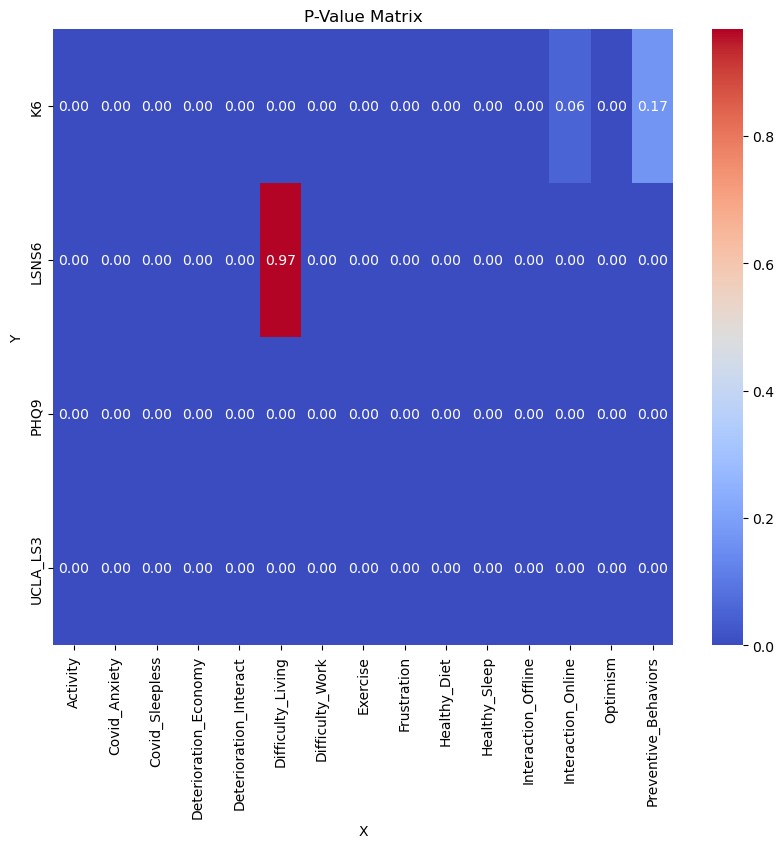

In [393]:
plt.figure(figsize=(10, 8))
sb.heatmap(p_table, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("P-Value Matrix")
plt.show()

### Psychological distress in vulnerable groups

In [216]:
NPD = df_dataset[df_dataset['K6'] <= 4]
MMPD = df_dataset[(df_dataset['K6'] > 4) & (df_dataset['K6'] <= 12)]
SPD = df_dataset[df_dataset['K6'] >= 13]

In [394]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [395]:
def categorize_health_worker(row):
    if row['Health_Worker_Self'] == 1 and row['Health_Worker_Family'] == 1:
        return '4'
    elif row['Health_Worker_Family'] == 1:
        return '3'
    elif row['Health_Worker_Self'] == 1:
        return '2'
    else:
        return '1'
    
def categorize_psychiatric_illness(row):
    if row['Current_Mental'] == 1 and row['Past_Mental'] == 1:
        return '4'
    elif row['Current_Mental'] == 1:
        return '3'
    elif row['Past_Mental'] == 1:
        return '2'
    else:
        return '1'
    
def categorize_physical_illness(row):
    if row['Current_Physical'] == 1 and row['Past_Physical'] == 1:
        return '4'
    elif row['Current_Physical'] == 1:
        return '3'
    elif row['Past_Physical'] == 1:
        return '2'
    else:
        return '1'
    
df_dataset['Health_worker_status'] = df_dataset.apply(categorize_health_worker, axis=1)
df_dataset['Psychiatric_illness'] = df_dataset.apply(categorize_psychiatric_illness, axis=1)
df_dataset['Physical_illness'] = df_dataset.apply(categorize_physical_illness, axis=1)

In [396]:
formula = 'K6 ~ C(Health_worker_status) + C(Psychiatric_illness) + C(Physical_illness) + C(Age_Group)'

# Fit the ANOVA model
model = ols(formula, data=df_dataset).fit()

In [398]:
anova_table = sm.stats.anova_lm(model, typ=1)
print(anova_table)

                              df         sum_sq      mean_sq           F  \
C(Health_worker_status)      3.0     309.370973   103.123658    3.964139   
C(Psychiatric_illness)       3.0   28853.253527  9617.751176  369.712473   
C(Physical_illness)          3.0     164.474315    54.824772    2.107499   
C(Age_Group)                 3.0   10485.923057  3495.307686  134.361851   
Residual                 11320.0  294480.038925    26.014138         NaN   

                                PR(>F)  
C(Health_worker_status)   7.781532e-03  
C(Psychiatric_illness)   4.358427e-229  
C(Physical_illness)       9.699504e-02  
C(Age_Group)              1.554427e-85  
Residual                           NaN  


Based on the p-values:

- "Psychiatric_illness" has a highly significant effect on the outcome variable, as indicated by the very low p-value (close to zero).
- "Physical_illness" also has a significant effect, although less pronounced compared to "Psychiatric_illness".
- "Age_Group" also shows a significant effect on the outcome variable.
- "Health_worker_status" does not appear to have a significant effect, as its p-value is greater than 0.05.

In [312]:
# print(df_dataset['Health_worker_status'])
# convert the column to np array

health_worker_status = df_dataset['Health_worker_status'].to_numpy()
k6_1 = df_dataset[df_dataset['Health_worker_status'] == '1']['K6'].to_numpy()
k6_2 = df_dataset[df_dataset['Health_worker_status'] == '2']['K6'].to_numpy()
k6_3 = df_dataset[df_dataset['Health_worker_status'] == '3']['K6'].to_numpy()
k6_4 = df_dataset[df_dataset['Health_worker_status'] == '4']['K6'].to_numpy()

data_x = [k6_1, k6_2, k6_3, k6_4]


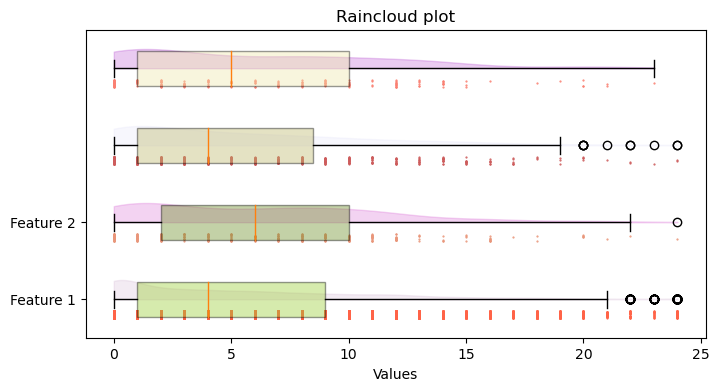

In [319]:
fig, ax = plt.subplots(figsize=(8, 4))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['yellowgreen', 'olivedrab', 'darkkhaki', 'palegoldenrod']

# Boxplot data
# print(type(df_dataset['Health_worker_status'][0]))
# k6_data = [
#     df_dataset[df_dataset['Health_worker_status'] == str(status)]['K6']
#     for status in range(1, 5)
# ]
# df_k6_health_worker = pd.concat(k6_data, axis=1)
# print(df_k6_health_worker)
# df_k6_health_worker = pd.DataFrame()

# # Filter data for each health worker status and assign to DataFrame columns
# for status in range(1, 5):
#     df_k6_health_worker[f'Health_worker_status_{status}'] = df_dataset[df_dataset['Health_worker_status'] == status]['K6']

# Print the DataFrame to check its contents
# print(df_k6_health_worker)
bp = ax.boxplot(data_x, patch_artist = True, vert = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

violin_colors = ['thistle', 'orchid', 'lavender', 'mediumorchid']

# Violinplot data
vp = ax.violinplot(data_x, points=500, 
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

scatter_colors = ['tomato', 'darksalmon', 'indianred', 'salmon']

# Scatterplot data
for idx, features in enumerate(data_x):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=.3, c=scatter_colors[idx])

plt.yticks(np.arange(1,3,1), ['Feature 1', 'Feature 2'])  # Set text labels.
plt.xlabel('Values')
plt.title("Raincloud plot")
plt.show()

The level of preventive behaviors taken to prevent COVID-19 transmission may be different between married and
single individuals.

### Factorial ANOVA

## normality test

KstestResult(statistic=0.6058901945218634, pvalue=0.0, statistic_location=2, statistic_sign=-1)
KstestResult(statistic=0.7285120693308514, pvalue=0.0, statistic_location=2, statistic_sign=-1)


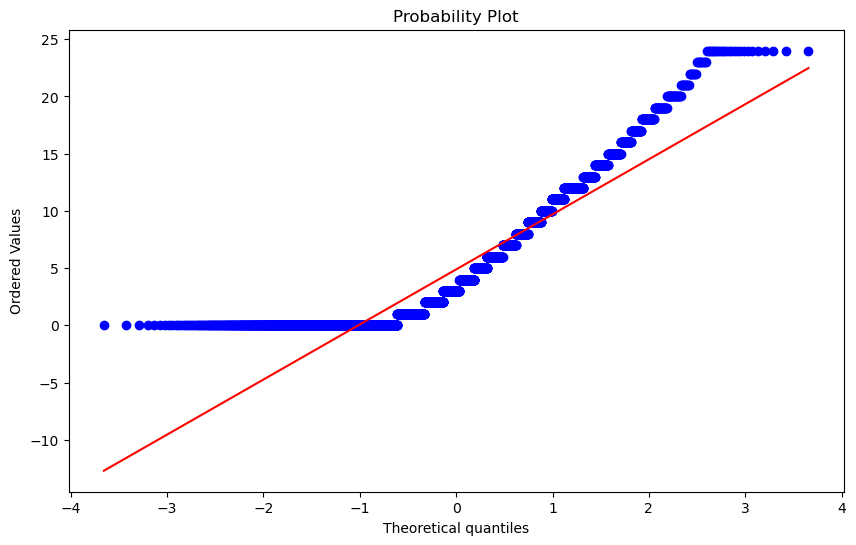

In [390]:
K6_age_group_1 = df_dataset[df_dataset['Sex'] == 1]['K6']
K6_age_group_2 = df_dataset[df_dataset['Sex'] == 2]['K6']

# check for normality using kolmogorov-smirnov test
print(stats.kstest(K6_age_group_1, 'norm'))
print(stats.kstest(K6_age_group_2, 'norm'))

# plot QQ plot
plt.figure(figsize=(10, 6))
stats.probplot(K6_age_group_1, dist="norm", plot=plt)
plt.show()